<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Outliers

## Examples

### 1. Finding Outliers

#### Example 1: Box Plot

In [1]:
# Example 1 
# ---
# Visualising outliers using box plot.
# ---
# A boxplot is a method for graphically depicting groups of numerical data 
# through their quantiles or the five-number summary 
# (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). 
# This method is normally used to detect outliers. 
# ---
#Dataset url = http://bit.ly/OutlierDataset
#

# Importing the required libraries
# 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


# Loading the dataset 
# 
df = pd.read_csv("http://bit.ly/OutlierDataset") 

# Display 5 rows of dataset 
# 
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


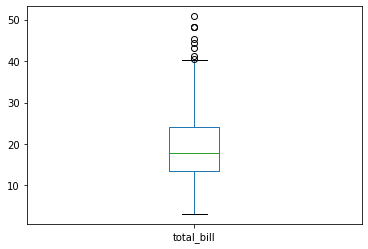

In [2]:
# Creating a box plot of the variable 'total_bill'
# ---
# 
df.boxplot(column =['total_bill'], grid = False) 

# NB:
# The circles in the plot indicate outliers and there are many.


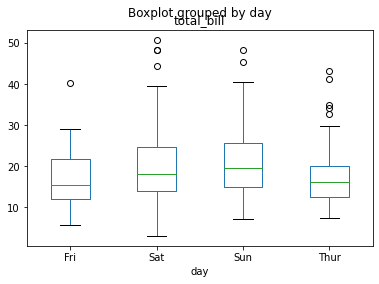

In [3]:
# It is also possible to identify outliers using more than one variables as shown
# ---
#  
df.boxplot(column =['total_bill'], by ='day', grid = False)

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


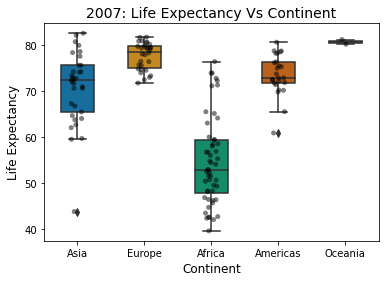

In [12]:
# Example 1-2: Outliers - Box plot (Multiple variables)
# ---
# Another way of finding outliers of multiple variables is by creating a box plot as shown below
# ---
# 

# Importing the seaborn library
# ---
#
import seaborn as sns

# Reading data from url as dataframe
# ---
# 
gapminder = pd.read_csv("http://bit.ly/FiveYearData") 

# Filtering the data such that we will keep data from all countries for the year 2007
gapminder_2007 = gapminder[gapminder['year']==2007] 

# We then specify from the multiple options to customize the boxplot with Seaborn.
# We choose color palette scheme for the boxplot with Seaborn. 
# Here, we chose colorblind friendly palette “colorblind”. 
# Other color palette options available in Seaborn include deep, muted, bright, pastel, and dark.
# Uncomment the line below after running the previous lines
bplot = sns.boxplot(y='lifeExp', x='continent', data=gapminder_2007, width=0.5, palette="colorblind")

# Boxplot alone is extremely useful in getting the summary of data within and between groups. 
# However, often, it is a good practice to overlay the actual data points on the boxplot.
# We use jitter = True option to spread the data points horizontally and also 
# make boxplot with data points using stripplot.
# Uncomment the line below after running the previous lines
bplot=sns.stripplot(y='lifeExp', x='continent',  data=gapminder_2007, jitter=True, marker='o', alpha=0.5, color='black')

# We then name and size our graph and axis
# Uncomment the lines below after running the previous lines
bplot.axes.set_title("2007: Life Expectancy Vs Continent", fontsize=14)
bplot.set_xlabel("Continent", fontsize=12)
bplot.set_ylabel("Life Expectancy", fontsize=12)
gapminder_2007

#### Example 2: Histogram

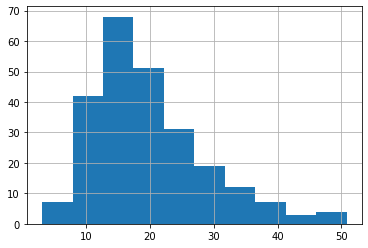

In [13]:
# Example 2
# ---
# We use a histogram to visualize the distibution of a numerical variable.
# The created histogram shows that the distribution is right-skewed 
# and there are extreme higher values at the right of the histogram.
# ---
# 
df.total_bill.hist()

#### Example 3: Scatter Plot

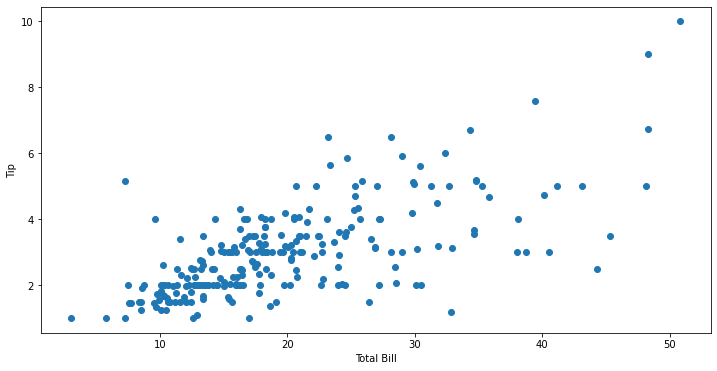

In [14]:
# Example 3
# ---
# The scatterplot will visualize the relationship between two quantitative variables. 
# The data points will be displayed as a collection of points. 
# Data points outside the general clustering of the two variables can be indicated as outliers.
# ---
# 
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['total_bill'], df['tip'])
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

#### Example 4: Z-Score

In [15]:
# Example 4: Outliers - Mathematical Function (Z-Score-)
# ---
# The Z-score is the signed number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured.
# The intuition behind Z-score is to describe any data point by finding their 
# relationship with the Standard Deviation and Mean of the group of data points. 
# Z-score is finding the distribution of data where mean is 0 
# and standard deviation is 1 i.e. normal distribution.
# You must be wondering that, how does this help in identifying the outliers? 
# Well, while calculating the Z-score we re-scale and center the data 
# and look for data points which are too far from zero. 
# These data points which are way too far from zero will be treated as the outliers. 
# In most of the cases a threshold of 3 or -3 is used i.e 
# if the Z-score value is greater than or less than 3 or -3 respectively, 
# that data point will be identified as an outlier.
# ---
# We will create the following function to calculate our z-scores and detect our outliers
# ---
# 


def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['total_bill'])

[48.27, 48.17, 50.81, 48.33]

In [16]:
# we want to use a copy of boston_df 

# removing the outliers
boston_zf = df['total_bill'] [(z < 3).all(axis=1)]

boston_zf

NameError: name 'z' is not defined

### 2. Dealing with Outliers

#### Example 1: Dropping outliers

In [17]:
# Example 2: 
# ---
# IQR Score 
# ---
# The IQR score uses the IQR scores to remove the outliers. 
# The rule of thumb is that anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
# ---
# Something to note about outlier methods is that they are likely to yield 
# different results due to the fact that they use different techniques (criteria) 
# for outlier detection
# ---
#

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(223, 7)
(244, 7)


## <font color="green">Challenges</font>

#### <font color="green">Challenge 1</font>

In [18]:
# Challenge 1
# ---
# Using a Box - Plot determine and remove the outliers in the following dataset 
# ---
# Dataset url = http://bit.ly/MSClimateDataset
# ---
# 
url = 'http://bit.ly/MSClimateDataset'
frame = pd.read_csv(url)

def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for column in frame.columns:
    try:
        outliers = detect_outlier(frame[column])
        frame = frame[~frame[column].isin(outliers)]
    except:
        pass
frame

,yyyy/mm/dd,year,month,day,ave_temp,high_temp,low_temp,precip,daylight,snowfall,ave_wind_speed,high_wind_speed,high_wind_direc
1,1987/1/2,1987,1,2,2.9,4.7,1.1,2.5,0.0,0,4.4,7.8,NNW
2,1987/1/3,1987,1,3,5.9,9.3,1.3,2.0,0.8,0,2.5,5.9,N
3,1987/1/4,1987,1,4,6.8,11.9,3.2,0.0,8.9,0,4.9,8.0,NNW
4,1987/1/5,1987,1,5,2.7,4.7,0.5,6.0,0.0,1,4.2,8.0,N
6,1987/1/7,1987,1,7,5.0,8.7,2.7,0.0,2.5,0,2.9,6.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,2017/12/27,2017,12,27,4.5,9.2,1.0,0.0,9.0,0,3.1,5.6,NNW
11319,2017/12/28,2017,12,28,4.8,9.8,1.1,0.0,9.0,0,3.3,6.0,NW
11320,2017/12/29,2017,12,29,6.1,10.5,2.3,0.0,8.6,0,3.4,6.7,NW
11321,2017/12/30,2017,12,30,6.2,11.1,1.0,0.0,8.9,0,2.8,5.8,NW


#### <font color="green">Challenge 2</font>

In [26]:
# Challenge 2
# ---
# Attached is a set of products in which a sales and marketing team are trying to determine 
# which products we should continue to sell, and which products to remove from our inventory. 
# The file contains BOTH historical sales data AND active inventory, 
# which can be discerned with the column titled "File Type".
# Find and deal with outliers in this dataset;
# ---
# Dataset url = http://bit.ly/MSProductSales
# ---
# 
url = 'http://bit.ly/MSProductSales'
frame = pd.read_csv(url)

'''def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for column in frame.columns:
    try:
        outliers = detect_outlier(frame[column])
        frame = frame[~frame[column].isin(outliers)]
    except:
        pass'''
frame

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


#### <font color="green">Challenge 3</font>

In [0]:
# Challenge 3
# ---
# Brazilian politicians are entitled to refunds if they spend any of their money 
# on an activity that is enabling them to "better serve the people".
# Those expenses are public data, however, there is little monitoring/data analysis of it. 
# A quick look at it shows a deputy with over 800 flights in one year. 
# Another deputy has over 140.000R$ expenses on mailing (old fashion mail) in one year.
# There are a lot of very suspicious data regarding the deputies expending behavior. 
# Can you help spot outliers and companies charging unusual amounts of money for a service?
# ---
# Dataset url = http://bit.ly/MSBrazilPoliticians
# ---
# 
